<a href="https://colab.research.google.com/github/NicoPP1/PDI/blob/main/TP2/TP2Parma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico Nº2 Procesamiento Digital de Imágenes
### Autor: Nicolás Daniel Parma Paternostro
### Consigna: 

* Manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

Observaciones: para cada uno estos deben mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.

* La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris.

Observaciones: el objetivo es ver cómo con diferentes paletas de colores se pueden apreciar ciertos detalles de una imagen, sin necesidad de modificar el contenido de la misma.

# Ejercicio 1, modificar la luminancia y saturación de una imagen


### Librerias requeridas

In [21]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

### Formulario para carga de imagen 

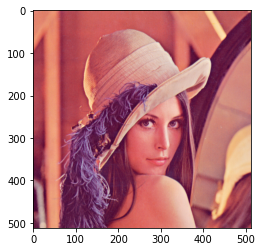

In [22]:
#@title Ingrese URL de la imagen deseada. { run: "auto", vertical-output: true }

url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" #@param {type:"string"}

#importo imagen
img = imageio.imread(url)

#Obtengo dimensiones de la imagen
dim = img.shape

#Muestro la imagen
plt.imshow(img)

### Funciones a utilizar

In [23]:
#Función para verificar que la luminancia no se encuentre fuera de rango
def checkY(mat):
    mat = np.clip(mat,0.0,1.0)
    return mat

#Función para verificar que el componente en fase no se encuentre fuera de rango
def checkI(mat):
    mat = np.clip(mat,-0.5957,0.5957)          
    return mat

#Función para verificar que el componente en cuadratura no se encuentre fuera de rango
def checkQ(mat):
    mat = np.clip(mat,-0.5226,0.5226)          
    return mat

#Función para obtener componentes RGB de una imagen y devolverlo en el espacio YIQ
def RGB2YIQ(img):
  r = img[:,:,0]/255
  g = img[:,:,1]/255
  b = img[:,:,2]/255

  Y = (r*0.299+g*0.587+b*0.114)
  I = (r*0.595716-g*0.274453-b*0.321263)
  Q = (r*0.211456-g*0.522591+b*0.311135)

  return(Y,I,Q)

#Función para obtener una imagen RGB a partir de los componentes YIQ modificadas
def YIQ2RGB(Y,I,Q):
    Y = checkY(Y)
    I = checkI(I)
    Q = checkQ(Q)
    
    r = (Y+0.9563*I+0.621*Q)*255
    g = (Y-0.2721*I-0.6474*Q)*255
    b = (Y-1.1070*I+1.7046*Q)*255

    print(f"Maximo de Y {np.amax(Y)}, I {np.amax(I)}, Q {np.amax(Q)}")
    print(f"Maximo de R {np.amax(r)}, G {np.amax(g)}, B {np.amax(b)}")

    img = np.zeros((dim[0],dim[1],3),dtype = 'uint8')
    img[:,:,0] = r
    img[:,:,1] = g
    img[:,:,2] = b

    return(img)


### Llamada de funciones y visualización de resultados

Maximo de Y 0.9608666666666665, I 0.0, Q 0.0
Maximo de R 245.02099999999996, G 245.02099999999996, B 245.02099999999996


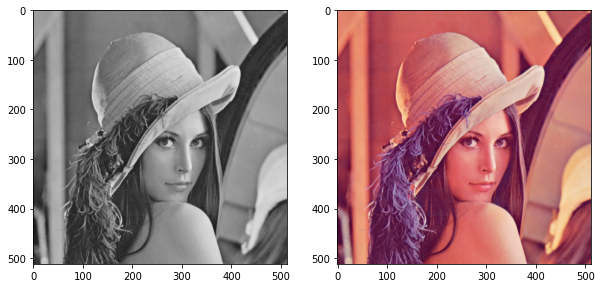

In [24]:
#Llamo a la función para obtener las componentes YIQ
Y,I,Q = RGB2YIQ(img)

#Sliders para modificar luminancia y saturación

#@title Mueva los slider para modificar la luminancia ($\alpha$) y cromaticidad ($\beta$) de la imagen. { run: "auto", vertical-output: true }
alpha = 1 #@param {type:"slider", min:0, max:3, step:0.1}
beta = 0 #@param {type:"slider", min:0, max:3, step:0.1}
img_modified = YIQ2RGB(alpha*Y,beta*I,beta*Q)

#Funciones para graficar los resultados
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 8)
ax[0].imshow(img_modified)
ax[1].imshow(img)

# Conclusiones
Se pudo modificar la luminancia y saturación de una imagen RGB, transformando la misma al espacio de colores YIQ para poder manipular dichas componentes y obtener la imagen modificada deseada mediante los sliders de $\alpha$ y $\beta$. Bajo ciertas combinaciones de $\alpha$ y $\beta$ se notan artefactos, las mismas son atribuidas a la modificación de la cromaticidad ya que la matriz YIQ y RGB no se van de rango para dichos valores (Observar los valores mostrados arriba de la imagen resultante)


# Mapas de colores
## Ejercicio 2, modificar la paleta de colores de una imagen 
### Nota: Si bien se podría haber utilizado las librerias y funciones de las celdas anteriores, se decidión armar el código desde cero para un mayor entendimiento y prolijidad.


### Librerias a utilizar

In [25]:
#Librerias
import imageio
import numpy as np
import matplotlib.pyplot as plt

### Método para abrir imagen adecuada (mapa de altitud)

In [28]:
#Abro imagen
img = imageio.imread('https://image.shutterstock.com/image-illustration/argentina-shaded-relief-map-major-600w-17780581.jpg')

### Funciones a utilizar

In [29]:
#Función para obtener los componentes YIQ a partir de una imagen RGB
def RGB2YIQ(img):
  r = img[:,:,0]/255
  g = img[:,:,1]/255
  b = img[:,:,2]/255

  Y = (r*0.299+g*0.587+b*0.114)*255
  I = (r*0.595716-g*0.274453-b*0.321263)*255
  Q = (r*0.211456-g*0.522591+b*0.311135)*255

  return(Y,I,Q)

### Obtengo la luminancia de la imagen y utilizo varias paletas de colores para mostrar los detalles de distinta manera

Paleta escala de grises


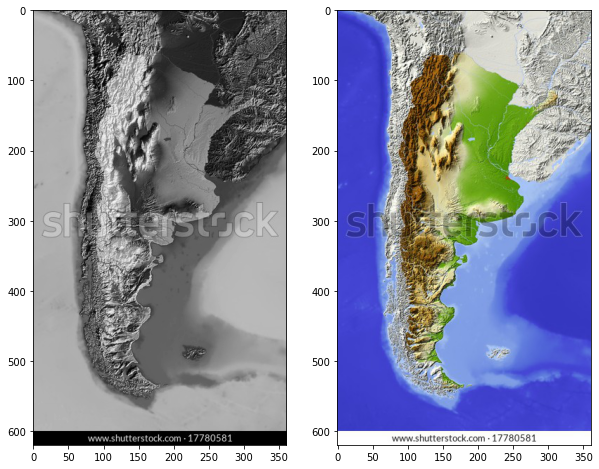

In [32]:
#Llamo a la función para obtener las componentes YIQ
Y,I,Q = RGB2YIQ(img)

#Muestro imagen con el mapcolor modificado
print("Paleta escala de grises")

#Grafico resultado e imagen original
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 8)
ax[0].imshow(Y, cmap = 'binary')
ax[1].imshow(img)

Paleta de color arcoiris


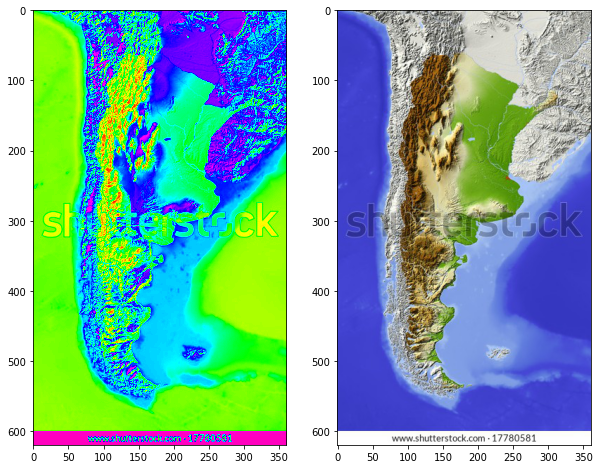

In [33]:
#Muestro imagen con el mapcolor modificado
print("Paleta de color arcoiris")

#Grafico resultado e imagen original
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 8)
ax[0].imshow(Y, cmap = 'gist_rainbow')
ax[1].imshow(img)

Paleta de color hot


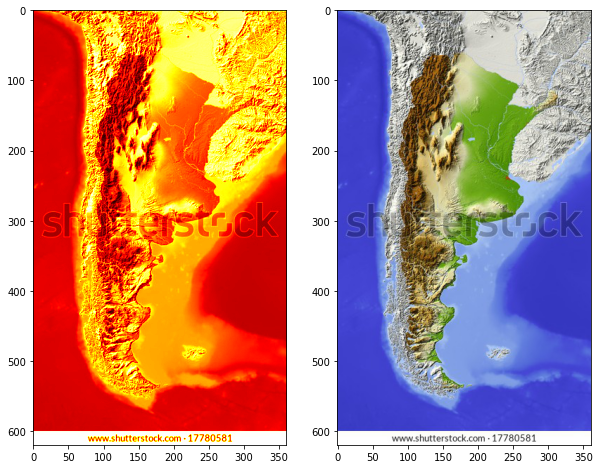

In [34]:
#Muestro imagen con el mapcolor modificado
print("Paleta de color hot")

#Grafico resultado e imagen original
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 8)
ax[0].imshow(Y, cmap = 'hot')
ax[1].imshow(img)

Paleta de color hsv


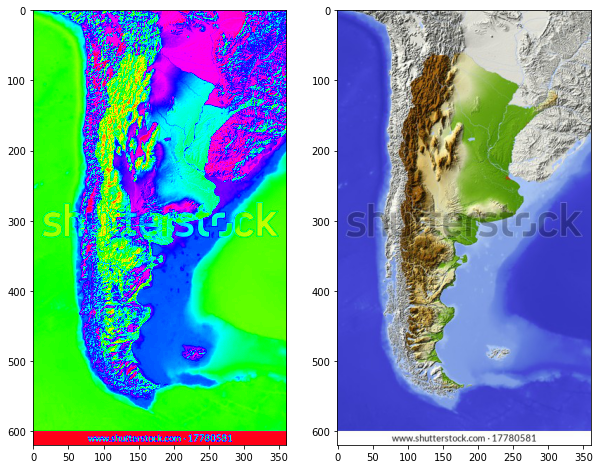

In [35]:
#Muestro imagen con el mapcolor modificado
print("Paleta de color hsv")

#Grafico resultado e imagen original
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 8)
ax[0].imshow(Y, cmap = 'hsv')
ax[1].imshow(img)

Mapa de color bone


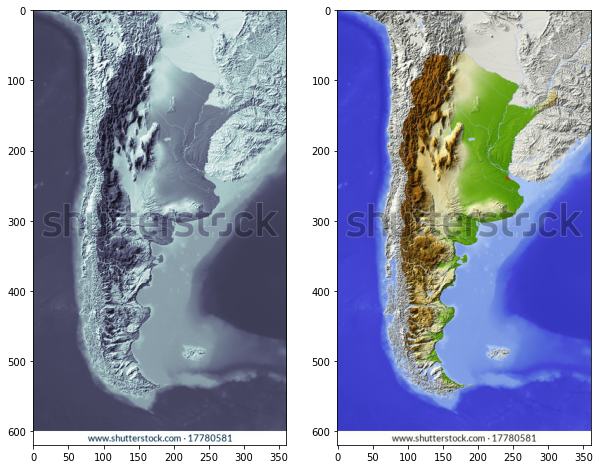

In [37]:
#@title Ingrese nombre de cmap deseado (ver: https://matplotlib.org/stable/tutorials/colors/colormaps.html) para distintas paletas de colores. { run: "auto", vertical-output: true }

#Muestro imagen con el mapcolor modificado y a elección del usuario
mapa = "bone" #@param {type:"string"}
print(f"Mapa de color {mapa}")

#Grafico resultado e imagen original
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 8)
ax[0].imshow(Y, cmap = mapa)
ax[1].imshow(img)

# Conclusiones
Se pudo modificar la paleta de colores de una imagen permitiendo así observar ciertos detalles que no eran posibles visualizar con la paleta de colores original. Para realizar esto, primero se debió obtener la componente de luminancia, ya que el dicho proceso no se podía realizar con una imagen RGB. Una vez obtenida dicha componente, solo basta con llamar al color map deseado. Se implementó un formulario para que el usuario viendo el final de la página (https://matplotlib.org/stable/tutorials/colors/colormaps.html) pueda ingresar la paleta de colores deseada. Cabe mencionar que existen paletas de colores sequenciales que varian suavemente entre una gama de colores en forma de gradiente (escala de grises o hot por ejemplo) y otras paletas cíclicas que no se comportan de dicha manera (hsv o arco iris por ejemplo).